# 15 総合演習問題

## 総合演習問題6問

In [1]:
# 以下は必要なモジュールのため、あらかじめ読み込んでおいてください。
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd
import time

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

## 15.1 総合演習問題
キーワード：教師あり学習、画像認識、複数カテゴリーの分類、混同行列

sklearnモジュールに入っているload_digitsを以下のようにして読み込み、各数字(0〜9)を予測するモデルを構築しましょう。このデータは、手書きの数字で、0から9までのテジタルデータです。数字のラベルがdigits.targetで、そのデータの特徴量はdigits.dataになります。その時にテストデータと学習データに分けて、モデルを構築し、混同行列の結果を表示させてください(train_test_splitのパラメータrandom_state=0で設定してください)。いくつかモデルを作成し、比較してみてください。どのモデルを使いますか。

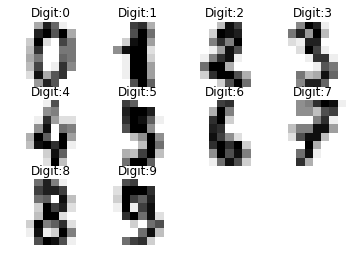

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# 分析対象データ
from sklearn.datasets import load_digits

digits = load_digits()

# 画像の表示
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(3,4,label+1)
    plt.axis('off')
    plt.imshow(img,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Digit:{0}'.format(label))

## 15.2 総合演習問題
キーワード：教師あり学習、回帰、複数モデルの比較

以下のデータを読み込み、アワビの年齢を予測するモデルを構築してみましょう。目的変数は、「Rings」になります。  
http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

参考URL：  
https://www.slideshare.net/hyperak/predicting-the-age-of-abalone　　
http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=1B4590990A8445EBC80996A092445868?doi=10.1.1.135.705&rep=rep1&type=pdf　　

## 15.3 総合演習問題
キーワード：教師あり学習、分類、マーケティング分析、検証、混同行列、正解率、適合率、再現率、F1スコア、ROC曲線、AUC

以前に扱いました以下のデータをダウンロードして、データ（bank-full.csv）を読み込んで、後の問いに答えてください。（bank-full.csvが分析対象データになります。）

http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

(1)  数値データ(age,balance,day,duration,campaign,pdays,previous)における基本統計量(レコード数、最大値、最小値、標準偏差など)を算出してください。  
(2)  データの"job","marital","education","default","housing","loan"のそれぞれについて、預金を申し込む人、申し込まない人の人数を算出してください。　　
(3)  y(預金を申し込む、申し込まない)を目的変数として、予測モデルを構築してください。モデルは複数（ロジスティック回帰、SVM、決定木、k-NN、ランダムフォレストなど）試してください。ただし、テスト用にデータはあらかじめ抜いてください(train_test_splitのパラメータrandom_state=0で設定してください)。     
(4)  テスト用のデータを使って、それぞれのモデルの検証をしましょう。各モデルのテストデータにおける正解率、適合率、再現率、F1スコア、混同行列を表示してください。どのモデルを使いますか。  
(5)  それぞれのモデルのROC曲線を引いて、AUCを算出し、比較できるようにしてください。

## 15.4 総合演習問題
キーワード：教師あり学習、教師なし学習、ハイブリッドアプローチ

本講座の機械学習の章で扱ったload_breast_cancerを使って、さらに予測精度（正解率）を上げるモデルを作成してみましょう。同じく、テスト用にデータはあらかじめ抜いて検証してください(train_test_splitのパラメータrandom_state=0で設定してください)。   

In [42]:
# 前回の解答
# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

In [43]:
# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
clf = model.fit(X_train_std,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train_std,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test_std,y_test))

pred_y = clf.predict(X_test_std)
confusion_m = confusion_matrix(y_test,pred_y)

print("Confution matrix:\n{}".format(confusion_m))

train: LogisticRegression 0.990610328638
test: LogisticRegression 0.958041958042
Confution matrix:
[[50  3]
 [ 3 87]]


データを標準化して、
単純にモデルを当てはめるとテストデータで正解率95.8％でした。この結果を上回ることはできるでしょうか。

## 15.5 総合演習問題
キーワード：時系列データ、欠損データの補完、シフト、ヒストグラム、教師あり学習

以下のように、2001年1月2日から2016年12月30日までの為替データ（JPYUSDとUSDEUR）を読み込み、問いに答えてください。

(1)読み込んだデータには、祝日や休日等による欠損（NaN）があります。その補完処理をするために、直近の前の日におけるデータで補完してください。ただし年月のデータがない場合もありますので、その場合、今回は無視してください（改めて日付データを作成して、分析をすることも可能ですが、今回はこのアプローチはとりません。）。  
(2)上記のデータで、各統計量の確認と時系列のグラフ化をしてください。  
(3)当日と前日における差分をとり、それぞれの変化率（当日-前日）/前日のデータをヒストグラムで表示してください。　　  
(4)将来の価格（例：次の日）を予測するモデルを構築してみましょう。具体的には、2016年11月を訓練データとして、当日の価格を目的変数として、前日、前々日、3日前の価格データを使ってモデル（線形回帰）を構築し、2016年12月をテストデータとして、検証してください。また、他の月や年で実施すると、どんな結果になりますか。  

**pip install pandas-datareaderで、モジュールをあらかじめダウンロードしてください。jupyterの右上にあるterminalで実行できます。**

In [72]:
import pandas_datareader.data as pdr

start_date = "2001/1/2"
end_date = "2016/12/30"

fx_jpusdata = pdr.DataReader("DEXJPUS","fred",start_date,end_date)
fx_useudata = pdr.DataReader("DEXUSEU","fred",start_date,end_date)

## 15.6 総合演習問題
キーワード：時系列データ、回帰分析

以下のデータを取得し、読み込んで以下の問いに答えてください。ただし、今回は2000年より前のデータ(1987~1999)を分析対象とします。

http://stat-computing.org/dataexpo/2009/the-data.html


**注：なお、現在のilectでは、たくさんのユーザーさんに使っていただくために、環境に制限等があります。ですので、以下のコード(Python)はilectではメモリーエラー等になってしまいますが、ある程度のスペックPCであればローカルで実行できますので、参考にしてください。ただし、必要な情報のみ抽出して計算するなどしていけば、実行可能だと思いますので、やってみてください。**

(1)データを読み込んだ後は、年×月の平均遅延時間を算出してください。何かわかることはありますか。  
(2)(1)で算出したデータについて、1月から12月までの結果を時系列の折れ線グラフにしてください。その時、年ごとに比較できるように、１つのグラフにまとめてください。（なので、1987年から1999年までのデータについて、それぞれの時系列グラフが並ぶイメージです。）  
(3)各航空会社（UniqueCarrier）ごとの平均遅延時間を算出してください。また、出発地(Origin)、目的地(Dest)を軸にして、平均遅延時間を算出してください。  
(4)遅延時間を予測するための予測モデルを構築します。目的変数をDepDelay、説明変数をArrDelayとDistanceにして、モデルを構築しましょう。

### **ヒント**

データの取得は、以下のスクリプトを参考に、実装と実行をしてください。ただし、以下を実行する場合は別ファイルとして、「ファイル名.sh」の形式で保存し、そのファイルをここで実行する場合は、「bash ファイル名.sh」で実行します。もしくは、terminalに移動し、専用のディレクトリなどを作って、スクリプトを実行して、データを取得してください。他、Pythonから取得する方法もありますし、以前はzipを展開してデータを読み込んでいましたが、zipのまま加工できるプログラムも書けますので、ぜひ調べてやってみてください。** なお、dataのダウンロードにとても時間がかかりますので、注意しましょう。**

## 参考：今後のデータ分析に向けて

以下は参考ですが、次のようなオープンデータを使って、データ分析に取り組んでみましょう。課題は明確になっていませんが、その課題を見つけることもデータ分析では大事です。

1. どのデータを分析対象にしますか？また、どんなことを目的にデータを分析しますか？どんなことをゴールにしますか？    
2. 分析対象となるデータに何か特徴や傾向はありますか？簡易集計してみましょう。そこからどんな仮設を立てますか？  
3. 目的や仮説等が明確になったら、どんな風にアプローチしますか？実装して、検証してください。  
4. 分析に明るくない人たち(中学までの数学しかわからないと想定)に今回の分析結果を報告するとして、どのような報告書（グラフやインサイトなど含む）を作成しますか？

なお、課題を特定していくことの重要性については、以下の本も参考になりますので、興味のある方は読んでみてください。

>[参考文献]

>『イシューからはじめよ―知的生産の「シンプルな本質」』(安宅和人 (著)、英治出版)

##### データソースサンプル（他のデータソースでも構いません）

- UCI DATA

http://archive.ics.uci.edu/ml/

- Bay Area Bike Share

http://www.bayareabikeshare.com/open-data
　　
- movielens

http://grouplens.org/datasets/movielens/


- MLDATA

http://mldata.org/

- Churn Data Set(provided by IBM)　　

https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv

- Netflix Prize Data Set　　

http://academictorrents.com/details/9b13183dc4d60676b773c9e2cd6de5e5542cee9a　　